# Multiple Linear Regression

is a statistical and machine-learning method used to model the relationship between one continuous target variable (Y) and two or more independent variables (X₁, X₂, X₃, …).

It is basically an extension of simple linear regression (which uses only one feature).

MLR tries to find the best-fitting linear equation that predicts a value based on multiple inputs:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \dots + \beta_n X_n + \varepsilon
$$
Where:

Y = output/target you want to predict

X’s = independent variables (features)

β’s = model coefficients

β₀ = intercept

ε = error term

# Libraries + Dependencies

In [1]:
!pip install gdown

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import t, f
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# The Dataset

In [3]:
!gdown 1mi5lAu0UsY4_DIUEsZC2WETD5r3WblDO

Downloading...
From: https://drive.google.com/uc?id=1mi5lAu0UsY4_DIUEsZC2WETD5r3WblDO
To: /content/Dataset Datathon.csv
100% 35.8k/35.8k [00:00<00:00, 48.7MB/s]


In [4]:
df = pd.read_csv('/content/Dataset Datathon.csv')

In [5]:
print(f"Dataset Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print()
df.head()

Dataset Dimensions: 190 rows × 32 columns



,Kabupaten/Kota,Tahun,Luas Wilayah,Indeks Pembangunan Manusia (IPM),Harapan Lama Sekolah (Tahun),Rata-rata Lama sekolah (Tahun),Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),...,Jumlah Penduduk (Ribu) Semester 1,Jumlah Penduduk (Ribu) Semester 2,STATUS BALITA GIZI KURANG BB,STATUS BALITA KURUS BB TB\n,STATUS BALITA PENDEK TB U\n,PRODUKSI PADI (TON),jmlh_industri_Q1,jmlh_industri_Q2,jmlh_industri_Q3,jmlh_industri_Q4
0,Pacitan,2020,1389.92,69.28,12.64,7.60,99.82,97.25,77.61,14.71,...,207215,209984,1576.0,827.0,827.0,83940.9,213.000,213.000,213.000,213.000
1,Ponorogo,2020,1305.70,71.57,13.73,7.54,99.61,98.93,78.66,24.69,...,349637,352735,2727.0,2348.0,2348.0,377333.2,575.000,575.000,575.000,575.000
2,Trenggalek,2020,1147.22,70.10,12.35,7.55,99.70,94.22,78.70,13.86,...,272330,271604,2203.0,1144.0,1144.0,108445.6,755.000,755.000,755.000,755.000
3,Tulungagung,2020,1055.65,73.15,13.31,8.33,99.58,98.47,79.72,25.06,...,399249,395246,3093.0,2075.0,2075.0,214398.1,5.082,5.082,5.082,5.082
4,Blitar,2020,1336.48,71.02,12.46,7.39,99.39,98.19,70.33,19.61,...,445959,445584,1952.0,1462.0,1462.0,196847.5,1.000,1.000,1.000,1.000


In [6]:
print(f"Column names:")
for i, col in enumerate(df.columns[:15], 1):
    print(f"  {i:2d}. {col}")

Column names:
   1. Kabupaten/Kota
   2. Tahun
   3. Luas Wilayah
   4. Indeks Pembangunan Manusia (IPM)
   5. Harapan Lama Sekolah (Tahun)
   6. Rata-rata Lama sekolah (Tahun)
   7. Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen)
   8. Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen)
   9. Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen)
  10. Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen)
  11. Rasio Guru per Siswa
  12. Persentase Penduduk (Persen)
  13. Persentase Penduduk Miskin (Persen)
  14. Tingkat Pengangguran Terbuka (TPT) - Agustus
  15. Tingkat Partisipasi Angkatan Kerja - Agustus


In [7]:
df.isna().sum()

,0
Kabupaten/Kota,0
Tahun,0
Luas Wilayah,0
Indeks Pembangunan Manusia (IPM),0
Harapan Lama Sekolah (Tahun),0
Rata-rata Lama sekolah (Tahun),0
Angka Partisipasi Sekolah (APS) Usia 7-12 (Persen),0
Angka Partisipasi Sekolah (APS) Usia 13-15 (Persen),0
Angka Partisipasi Sekolah (APS) Usia 16-18 (Persen),0
Angka Partisipasi Sekolah (APS) Usia 19-23 (Persen),0


# Feature Engineering and Selection

In [8]:
industry_cols = [col for col in df.columns if 'industri' in col.lower() and
                 any(q in col.lower() for q in ['q1', 'q2', 'q3', 'q4'])]

print(f"Industry columns found ({len(industry_cols)}):")
for col in industry_cols:
    print(f"  - {col}")

Industry columns found (4):
  - jmlh_industri_Q1
  - jmlh_industri_Q2
  - jmlh_industri_Q3
  - jmlh_industri_Q4


In [9]:
if len(industry_cols) > 0:
    df['jumlah_industri_total'] = df[industry_cols].sum(axis=1)
    print(f"Descriptive Statistics:")
    print(f"  Count : {df['jumlah_industri_total'].count()}")
    print(f"  Mean  : {df['jumlah_industri_total'].mean():.2f}")
    print(f"  Std   : {df['jumlah_industri_total'].std():.2f}")
    print(f"  Min   : {df['jumlah_industri_total'].min():.2f}")
    print(f"  Max   : {df['jumlah_industri_total'].max():.2f}")
else:
    print("No industry columns found!")
    df['jumlah_industri_total'] = 0

Descriptive Statistics:
  Count : 190
  Mean  : 753.24
  Std   : 1254.88
  Min   : 4.00
  Max   : 3992.00


In [10]:
target = 'Persentase Penduduk Miskin (Persen)'

features = [
    'Indeks Pembangunan Manusia (IPM)',
    'Tingkat Pengangguran Terbuka (TPT) - Agustus',
    'Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)',
    'Gini Ratio',
    'Jumlah Penerima Bansos',
    'Harapan Lama Sekolah (Tahun)',
    'STATUS BALITA PENDEK TB-U',
    'PRODUKSI PADI (TON)',
    'jumlah_industri_total',
    'Laju Pertumbuhan Penduduk per Tahun (Persen)',
    'Kepadatan Penduduk per km persegi (km²)'
]

In [11]:
if target in df.columns:
    print(f"Target Found: {target}")
else:
    print(f"Target Not Found: {target}")
    similar = [col for col in df.columns if 'miskin' in col.lower() or 'kemiskinan' in col.lower()]
    if similar:
        print(f"  Similar columns: {similar[:3]}")

Target Found: Persentase Penduduk Miskin (Persen)


In [12]:
available_features = []
missing_features = []

for i, feature in enumerate(features, 1):
    if feature in df.columns:
        available_features.append(feature)
        print(f"Feature {i:2d}: {feature}")
    else:
        missing_features.append(feature)
        print(f"Feature {i:2d}: {feature} - Not Found")

Feature  1: Indeks Pembangunan Manusia (IPM)
Feature  2: Tingkat Pengangguran Terbuka (TPT) - Agustus
Feature  3: Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)
Feature  4: Gini Ratio
Feature  5: Jumlah Penerima Bansos
Feature  6: Harapan Lama Sekolah (Tahun)
Feature  7: STATUS BALITA PENDEK TB-U - Not Found
Feature  8: PRODUKSI PADI (TON)
Feature  9: jumlah_industri_total
Feature 10: Laju Pertumbuhan Penduduk per Tahun (Persen) - Not Found
Feature 11: Kepadatan Penduduk per km persegi (km²)


In [13]:
print(f"Target variable    : {'Found' if target in df.columns else 'Not Found'}")
print(f"Features available : {len(available_features)}/{len(features)}")
print(f"Features missing   : {len(missing_features)}/{len(features)}")

Target variable    : Found
Features available : 9/11
Features missing   : 2/11


In [14]:
X_names = available_features

# Check Missing Value and Data Quality

In [15]:
print(f"Missing values in target variable:")
print(f"  {target}: {df[target].isnull().sum()} missing ({df[target].isnull().sum()/len(df)*100:.2f}%)")

Missing values in target variable:
  Persentase Penduduk Miskin (Persen): 0 missing (0.00%)


In [16]:
print(f"Missing values in FEATURES:")
total_missing = 0
for feature in X_names:
    missing_count = df[feature].isnull().sum()
    missing_pct = missing_count / len(df) * 100
    total_missing += missing_count
    status = "✓" if missing_count == 0 else "⚠"
    print(f"  {status} {feature}: {missing_count} missing ({missing_pct:.2f}%)")

Missing values in FEATURES:
  ✓ Indeks Pembangunan Manusia (IPM): 0 missing (0.00%)
  ✓ Tingkat Pengangguran Terbuka (TPT) - Agustus: 0 missing (0.00%)
  ✓ Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah): 0 missing (0.00%)
  ✓ Gini Ratio: 0 missing (0.00%)
  ✓ Jumlah Penerima Bansos: 0 missing (0.00%)
  ✓ Harapan Lama Sekolah (Tahun): 0 missing (0.00%)
  ✓ PRODUKSI PADI (TON): 0 missing (0.00%)
  ✓ jumlah_industri_total: 0 missing (0.00%)
  ✓ Kepadatan Penduduk per km persegi (km²): 0 missing (0.00%)


In [17]:
print(f"Total missing values: {total_missing}")

Total missing values: 0


In [18]:
df_clean = df[[target] + X_names].dropna()
print(f"Original rows       : {len(df)}")
print(f"Rows with missing   : {len(df) - len(df_clean)}")
print(f"Clean rows (final)  : {len(df_clean)}")
print(f"Percentage removed  : {(len(df) - len(df_clean))/len(df)*100:.2f}%")

Original rows       : 190
Rows with missing   : 0
Clean rows (final)  : 190
Percentage removed  : 0.00%


# Descriptive Statistic

In [19]:
print(f"Target Variable: {target}")
print(f"{'Statistic':<15} | {'Value':>15}")
print(f"{'Count':<15} | {df_clean[target].count():>15.0f}")
print(f"{'Mean':<15} | {df_clean[target].mean():>15.4f}")
print(f"{'Std Dev':<15} | {df_clean[target].std():>15.4f}")
print(f"{'Min':<15} | {df_clean[target].min():>15.4f}")
print(f"{'25%':<15} | {df_clean[target].quantile(0.25):>15.4f}")
print(f"{'Median (50%)':<15} | {df_clean[target].median():>15.4f}")
print(f"{'75%':<15} | {df_clean[target].quantile(0.75):>15.4f}")
print(f"{'Max':<15} | {df_clean[target].max():>15.4f}")

Target Variable: Persentase Penduduk Miskin (Persen)
Statistic       |           Value
Count           |             190
Mean            |         10.5488
Std Dev         |          4.4106
Min             |          3.0600
25%             |          7.3325
Median (50%)    |          9.9750
75%             |         12.8100
Max             |         23.7600


In [20]:
print(f"Features Summary:")
print(f"{'Variable':<55} | {'Mean':>12} | {'Std':>12} | {'Min':>12} | {'Max':>12}")
for feature in X_names:
    print(f"{feature:<55} | {df_clean[feature].mean():>12.2f} | {df_clean[feature].std():>12.2f} | {df_clean[feature].min():>12.2f} | {df_clean[feature].max():>12.2f}")

Features Summary:
Variable                                                |         Mean |          Std |          Min |          Max
Indeks Pembangunan Manusia (IPM)                        |        73.92 |         4.72 |        64.75 |        84.00
Tingkat Pengangguran Terbuka (TPT) - Agustus            |         5.14 |         1.79 |         1.36 |        10.97
Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)   |     11891.12 |      2243.87 |      8610.00 |     18977.00
Gini Ratio                                              |       298.36 |       110.35 |         0.28 |       435.00
Jumlah Penerima Bansos                                  |      2088.79 |      1675.72 |        14.00 |      8991.00
Harapan Lama Sekolah (Tahun)                            |        13.46 |         0.90 |        11.60 |        15.79
PRODUKSI PADI (TON)                                     |    253903.89 |    219160.46 |      3292.78 |    903882.30
jumlah_industri_total                                 

## Prepare X and Y

In [21]:
Y = df_clean[target].values.reshape(-1, 1)
X_raw = df_clean[X_names].values

print(f"Matrix dimensions:")
print(f"Y (target vector) : {Y.shape} = ({Y.shape[0]} observations × 1)")
print(f"X_raw (features)  : {X_raw.shape} = ({X_raw.shape[0]} observations × {X_raw.shape[1]} features)")

Matrix dimensions:
Y (target vector) : (190, 1) = (190 observations × 1)
X_raw (features)  : (190, 9) = (190 observations × 9 features)


In [22]:
intercept = np.ones((X_raw.shape[0], 1))
X = np.hstack((intercept, X_raw))

print(f"X (with intercept)  : {X.shape} = ({X.shape[0]} observations × {X.shape[1]} parameters)")

X (with intercept)  : (190, 10) = (190 observations × 10 parameters)


In [23]:
N = X.shape[0]
k = X.shape[1] - 1
p = X.shape[1]

print(f"Model Parameters:")
print(f"N (observations)  : {N}")
print(f"k (features)      : {k}")
print(f"p (total parameters) : {p} (intercept + {k} features)")
print(f"df (residual)     : {N - p} = N - k - 1")

Model Parameters:
N (observations)  : 190
k (features)      : 9
p (total parameters) : 10 (intercept + 9 features)
df (residual)     : 180 = N - k - 1


In [24]:
print(f"First 5 rows of X matrix (with intercept):")
print(X[:5, :min(6, X.shape[1])])

print(f"First 5 values of Y vector:")
print(Y[:5].flatten())

First 5 rows of X matrix (with intercept):
[[1.0000e+00 6.9280e+01 2.2800e+00 8.7960e+03 3.5000e-01 2.0590e+03]
 [1.0000e+00 7.1570e+01 4.4500e+00 9.6700e+03 3.8000e-01 1.1010e+03]
 [1.0000e+00 7.0100e+01 4.1100e+00 9.6300e+03 3.7900e+02 3.1740e+03]
 [1.0000e+00 7.3150e+01 4.6100e+00 1.0705e+04 3.3600e+02 6.9100e+02]
 [1.0000e+00 7.1020e+01 3.8200e+00 1.0654e+04 3.4800e+02 8.2100e+02]]
First 5 values of Y vector:
[14.54  9.95 11.62  7.33  9.33]


## Calculate X'X

In [25]:
XTX = X.T @ X

print(f"Formula: X'X = X^T × X")
print(f"Matrix dimensions:")
print(f"X^T : ({X.shape[1]} × {X.shape[0]})")
print(f"X   : ({X.shape[0]} × {X.shape[1]})")
print(f"X'X : ({XTX.shape[0]} × {XTX.shape[1]})")

Formula: X'X = X^T × X
Matrix dimensions:
X^T : (10 × 190)
X   : (190 × 10)
X'X : (10 × 10)


In [26]:
print(f"X'X Matrix (showing first 5×5 elements):")
print(XTX[:5, :5])

X'X Matrix (showing first 5×5 elements):
[[1.90000000e+02 1.40455800e+04 9.76610000e+02 2.25931300e+06
  5.66880400e+04]
 [1.40455800e+04 1.04251285e+06 7.31301706e+04 1.68899350e+08
  4.20718148e+06]
 [9.76610000e+02 7.31301706e+04 5.62529310e+03 1.20744928e+07
  2.95785719e+05]
 [2.25931300e+06 1.68899350e+08 1.20744928e+07 2.78173729e+10
  6.83829413e+08]
 [5.66880400e+04 4.20718148e+06 2.95785719e+05 6.83829413e+08
  1.92148654e+07]]


## Calculate (X'X^(-1))

In [27]:
try:
    XTX_inv = np.linalg.inv(XTX)
    print(f"Successfully computed (X'X)^(-1)")
except np.linalg.LinAlgError:
    print(f"Matrix X'X is singular (not invertible)")
    sys.exit(1)

Successfully computed (X'X)^(-1)


In [28]:
print(f"Matrix dimensions:")
print(f"(X'X)^(-1) : ({XTX_inv.shape[0]} × {XTX_inv.shape[1]})")

Matrix dimensions:
(X'X)^(-1) : (10 × 10)


In [29]:
print(f"(X'X)^(-1) Matrix (showing first 5×5 elements):")
print(XTX_inv[:5, :5])

(X'X)^(-1) Matrix (showing first 5×5 elements):
[[ 6.74155436e+00 -1.45251037e-01  8.21163008e-03  2.31342534e-04
  -2.67473632e-04]
 [-1.45251037e-01  4.41713117e-03 -2.51129973e-04 -6.34781015e-06
   3.45122581e-06]
 [ 8.21163008e-03 -2.51129973e-04  2.68152085e-03 -8.62093403e-07
   3.14197481e-07]
 [ 2.31342534e-04 -6.34781015e-06 -8.62093403e-07  1.28933322e-08
  -1.10288762e-08]
 [-2.67473632e-04  3.45122581e-06  3.14197481e-07 -1.10288762e-08
   4.62218930e-07]]


In [30]:
verification = XTX @ XTX_inv
print(f"Verification: (X'X) × (X'X)^(-1) should equal Identity Matrix I")
print(f"Diagonal elements of result:")
print(f"  {np.diag(verification)[:5]}")
print(f"Off-diagonal elements:")
print(f"  Max absolute value: {np.max(np.abs(verification - np.eye(verification.shape[0]))):.10f}")

Verification: (X'X) × (X'X)^(-1) should equal Identity Matrix I
Diagonal elements of result:
  [1. 1. 1. 1. 1.]
Off-diagonal elements:
  Max absolute value: 0.0000000056


## Calculate X'Y

In [31]:
XTY = X.T @ Y

print(f"Formula: X'Y = X^T × Y")
print(f"\nMatrix dimensions:")
print(f"  X^T : ({X.shape[1]} × {X.shape[0]})")
print(f"  Y   : ({Y.shape[0]} × 1)")
print(f"  X'Y : ({XTY.shape[0]} × {XTY.shape[1]})")

Formula: X'Y = X^T × Y

Matrix dimensions:
  X^T : (10 × 190)
  Y   : (190 × 1)
  X'Y : (10 × 1)


In [32]:
print(f"X'Y Vector (first 5 elements):")
print(XTY[:5].flatten())

X'Y Vector (first 5 elements):
[2.00427000e+03 1.44976795e+05 9.55934110e+03 2.25044946e+07
 5.81551164e+05]


## Estimate Regression Coefficient β̂ = (X'X)^(-1) X'Y

In [33]:
B_hat = XTX_inv @ XTY

print(f"Formula: β̂ = (X'X)^(-1) × X'Y")
print(f"\nMatrix dimensions:")
print(f"  (X'X)^(-1) : ({XTX_inv.shape[0]} × {XTX_inv.shape[1]})")
print(f"  X'Y        : ({XTY.shape[0]} × {XTY.shape[1]})")
print(f"  β̂          : ({B_hat.shape[0]} × {B_hat.shape[1]})")

Formula: β̂ = (X'X)^(-1) × X'Y

Matrix dimensions:
  (X'X)^(-1) : (10 × 10)
  X'Y        : (10 × 1)
  β̂          : (10 × 1)


In [34]:
coefficient_names = ['Intercept (β₀)'] + [f'{name}' for name in X_names]

print(f"Estimated Regression Coefficients (β̂):")
print(f"{'Coefficient':<60} | {'Value':>20}")
for i, name in enumerate(coefficient_names):
    print(f"{name:<60} | {B_hat[i][0]:>20.10f}")

Estimated Regression Coefficients (β̂):
Coefficient                                                  |                Value
Intercept (β₀)                                               |        77.7244315725
Indeks Pembangunan Manusia (IPM)                             |        -1.1515966507
Tingkat Pengangguran Terbuka (TPT) - Agustus                 |        -0.1240172894
Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)        |         0.0008600897
Gini Ratio                                                   |        -0.0017230150
Jumlah Penerima Bansos                                       |         0.0007289515
Harapan Lama Sekolah (Tahun)                                 |         0.5427649348
PRODUKSI PADI (TON)                                          |        -0.0000016556
jumlah_industri_total                                        |         0.0005508432
Kepadatan Penduduk per km persegi (km²)                      |         0.0000347923


In [35]:
print(f"Regression Equation:")
equation = f"Ŷ = {B_hat[0][0]:.6f}"
for i, name in enumerate(X_names, 1):
    coef = B_hat[i][0]
    sign = "+" if coef >= 0 else "-"
    equation += f" {sign} {abs(coef):.6f}×(X{i})"
print(f"\n{equation}\n")

Regression Equation:

Ŷ = 77.724432 - 1.151597×(X1) - 0.124017×(X2) + 0.000860×(X3) - 0.001723×(X4) + 0.000729×(X5) + 0.542765×(X6) - 0.000002×(X7) + 0.000551×(X8) + 0.000035×(X9)



## Predicted Values Ŷ and Residuals (e)

In [36]:
Y_hat = X @ B_hat
e = Y - Y_hat

print(f"Formula for predictions: Ŷ = X × β̂")
print(f"Formula for residuals  : e = Y - Ŷ")
print(f"\nDimensions:")
print(f"  Ŷ (predicted values) : {Y_hat.shape}")
print(f"  e (residuals)        : {e.shape}")

Formula for predictions: Ŷ = X × β̂
Formula for residuals  : e = Y - Ŷ

Dimensions:
  Ŷ (predicted values) : (190, 1)
  e (residuals)        : (190, 1)


In [37]:
print(f"First 10 observations:")
print(f"{'Y (Actual)':>15} | {'Ŷ (Predicted)':>15} | {'e (Residual)':>15}")
for i in range(min(10, len(Y))):
    print(f"{Y[i][0]:15.6f} | {Y_hat[i][0]:15.6f} | {e[i][0]:15.6f}")

First 10 observations:
     Y (Actual) |   Ŷ (Predicted) |    e (Residual)
      14.540000 |       13.930291 |        0.609709
       9.950000 |       11.991454 |       -2.041454
      11.620000 |       14.640442 |       -3.020442
       7.330000 |        8.961797 |       -1.631797
       9.330000 |       11.097571 |       -1.767571
      11.400000 |       10.598398 |        0.801602
      10.150000 |       11.513779 |       -1.363779
       9.830000 |       14.274451 |       -4.444451
      10.090000 |       14.130016 |       -4.040016
       8.060000 |       11.064479 |       -3.004479


In [38]:
print(f"Residual Statistics:")
print(f"  Sum of residuals    : {np.sum(e):.10f}")
print(f"  Mean of residuals   : {np.mean(e):.10f}")
print(f"  Std of residuals    : {np.std(e, ddof=1):.6f}")
print(f"  Min residual        : {np.min(e):.6f}")
print(f"  Max residual        : {np.max(e):.6f}")

Residual Statistics:
  Sum of residuals    : -0.0000000001
  Mean of residuals   : -0.0000000000
  Std of residuals    : 2.119406
  Min residual        : -4.444451
  Max residual        : 5.510404


## Calculate SST, SSR, SSE

In [39]:
# SST
Y_mean = np.mean(Y)
SST = np.sum((Y - Y_mean)**2)

print(f"Formula: SST = Σ(Yᵢ - Ȳ)²")
print(f"\nWhere:")
print(f"  Yᵢ = individual observed values")
print(f"  Ȳ  = mean of Y = {Y_mean:.8f}")

print(f"\nCalculation:")
print(f"  SST = Σ(Yᵢ - {Y_mean:.6f})²")
print(f"      = {SST:.8f}")

Formula: SST = Σ(Yᵢ - Ȳ)²

Where:
  Yᵢ = individual observed values
  Ȳ  = mean of Y = 10.54878947

Calculation:
  SST = Σ(Yᵢ - 10.548789)²
      = 3676.72542158


In [40]:
# SSR
SSR = np.sum((Y_hat - Y_mean)**2)

print(f"Formula: SSR = Σ(Ŷᵢ - Ȳ)²")
print(f"\nWhere:")
print(f"  Ŷᵢ = predicted values from the model")
print(f"  Ȳ  = mean of Y = {Y_mean:.8f}")

print(f"\nCalculation:")
print(f"  SSR = Σ(Ŷᵢ - {Y_mean:.6f})²")
print(f"      = {SSR:.8f}")

Formula: SSR = Σ(Ŷᵢ - Ȳ)²

Where:
  Ŷᵢ = predicted values from the model
  Ȳ  = mean of Y = 10.54878947

Calculation:
  SSR = Σ(Ŷᵢ - 10.548789)²
      = 2827.75981742


In [41]:
SSE = np.sum(e**2)

print(f"Formula: SSE = Σ(Yᵢ - Ŷᵢ)² = Σeᵢ²")
print(f"\nWhere:")
print(f"  eᵢ = Yᵢ - Ŷᵢ = residuals")

print(f"\nCalculation:")
print(f"  SSE = Σ(residuals)²")
print(f"      = {SSE:.8f}")

Formula: SSE = Σ(Yᵢ - Ŷᵢ)² = Σeᵢ²

Where:
  eᵢ = Yᵢ - Ŷᵢ = residuals

Calculation:
  SSE = Σ(residuals)²
      = 848.96560416


In [42]:
print(f"SST = {SST:.8f}")
print(f"SSR = {SSR:.8f}")
print(f"SSE = {SSE:.8f}")
print(f"SSR + SSE = {SSR + SSE:.8f}")
print(f"Difference: {abs(SST - (SSR + SSE)):.10f}")

SST = 3676.72542158
SSR = 2827.75981742
SSE = 848.96560416
SSR + SSE = 3676.72542158
Difference: 0.0000000007


## Anova Table

In [43]:
df_regression = k
df_residual = N - k - 1
df_total = N - 1

MSR = SSR / df_regression
MSE = SSE / df_residual

In [44]:
print(f"Anova Table")
print(f"{'Source':<20} | {'df':>10} | {'Sum of Squares':>20} | {'Mean Square':>20}")
print(f"{'Regression':<20} | {df_regression:>10} | {SSR:>20.8f} | {MSR:>20.8f}")
print(f"{'Residual (Error)':<20} | {df_residual:>10} | {SSE:>20.8f} | {MSE:>20.8f}")
print(f"{'Total':<20} | {df_total:>10} | {SST:>20.8f} | {'-':>20}")

Anova Table
Source               |         df |       Sum of Squares |          Mean Square
Regression           |          9 |        2827.75981742 |         314.19553527
Residual (Error)     |        180 |         848.96560416 |           4.71647558
Total                |        189 |        3676.72542158 |                    -


In [45]:
print(f"Formulas:")
print(f"  MSR (Mean Square Regression) = SSR / df_regression = {SSR:.6f} / {df_regression} = {MSR:.8f}")
print(f"  MSE (Mean Square Error)      = SSE / df_residual   = {SSE:.6f} / {df_residual} = {MSE:.8f}")

Formulas:
  MSR (Mean Square Regression) = SSR / df_regression = 2827.759817 / 9 = 314.19553527
  MSE (Mean Square Error)      = SSE / df_residual   = 848.965604 / 180 = 4.71647558


In [46]:
print(f"Degrees of Freedom:")
print(f"  df_regression = k = {df_regression}")
print(f"  df_residual   = N - k - 1 = {N} - {k} - 1 = {df_residual}")
print(f"  df_total      = N - 1 = {N} - 1 = {df_total}")

Degrees of Freedom:
  df_regression = k = 9
  df_residual   = N - k - 1 = 190 - 9 - 1 = 180
  df_total      = N - 1 = 190 - 1 = 189


## Calculate R², Adjusted R², and RMSE

In [47]:
R2 = SSR / SST
Adj_R2 = 1 - ((1 - R2) * (N - 1) / (N - k - 1))

In [48]:
print(f"R² (R-Squared):")
print(f"Formula: R² = SSR / SST")
print(f"            = {SSR:.8f} / {SST:.8f}")
print(f"            = {R2:.8f}")
print(f"            = {R2*100:.4f}%")

print(f"\nInterpretation:")
print(f"  → {R2*100:.4f}% of the variation in '{target}' is explained by the model")
print(f"  → {(1-R2)*100:.4f}% of the variation remains unexplained")

R² (R-Squared):
Formula: R² = SSR / SST
            = 2827.75981742 / 3676.72542158
            = 0.76909736
            = 76.9097%

Interpretation:
  → 76.9097% of the variation in 'Persentase Penduduk Miskin (Persen)' is explained by the model
  → 23.0903% of the variation remains unexplained


In [49]:
print(f"Adjusted R²:")
print(f"Formula: Adj R² = 1 - [(1 - R²) × (N-1) / (N-k-1)]")
print(f"                = 1 - [(1 - {R2:.8f}) × ({N}-1) / ({N}-{k}-1)]")
print(f"                = 1 - [{1-R2:.8f} × {N-1} / {N-k-1}]")
print(f"                = {Adj_R2:.8f}")
print(f"                = {Adj_R2*100:.4f}%")

print(f"\nInterpretation:")
print(f"  → Adjusted R² accounts for the number of predictors in the model")
print(f"  → Adjusted R² = {Adj_R2*100:.4f}% (adjusted for {k} predictors)")
print(f"  → Difference from R²: {(R2 - Adj_R2)*100:.4f}%")

Adjusted R²:
Formula: Adj R² = 1 - [(1 - R²) × (N-1) / (N-k-1)]
                = 1 - [(1 - 0.76909736) × (190-1) / (190-9-1)]
                = 1 - [0.23090264 × 189 / 180]
                = 0.75755223
                = 75.7552%

Interpretation:
  → Adjusted R² accounts for the number of predictors in the model
  → Adjusted R² = 75.7552% (adjusted for 9 predictors)
  → Difference from R²: 1.1545%


In [50]:
RMSE = np.sqrt(MSE)

print(f"Formula: RMSE = √MSE = √(SSE / df_residual)")
print(f"                     = √({SSE:.8f} / {df_residual})")
print(f"                     = √{MSE:.8f}")
print(f"                     = {RMSE:.8f}")

print(f"\nInterpretation:")
print(f"  → The average prediction error is approximately {RMSE:.4f} units")
print(f"  → On average, predictions deviate from actual values by {RMSE:.4f}")
print(f"  → Lower RMSE indicates better model fit")
print(f"  → RMSE is in the same units as the target variable: {target}")

Formula: RMSE = √MSE = √(SSE / df_residual)
                     = √(848.96560416 / 180)
                     = √4.71647558
                     = 2.17174482

Interpretation:
  → The average prediction error is approximately 2.1717 units
  → On average, predictions deviate from actual values by 2.1717
  → Lower RMSE indicates better model fit
  → RMSE is in the same units as the target variable: Persentase Penduduk Miskin (Persen)


In [51]:
MAE = np.mean(np.abs(e))
print(f"Additional Error Metrics:")
print(f"MAE (Mean Absolute Error) = {MAE:.8f}")
print(f"MSE (Mean Square Error)   = {MSE:.8f}")
print(f"RMSE                      = {RMSE:.8f}")

Additional Error Metrics:
MAE (Mean Absolute Error) = 1.77340935
MSE (Mean Square Error)   = 4.71647558
RMSE                      = 2.17174482


## F-Test

In [52]:
F_stat = MSR / MSE
F_critical = f.ppf(0.95, df_regression, df_residual)
F_pvalue = 1 - f.cdf(F_stat, df_regression, df_residual)

In [53]:
print(f"Hypotheses:")
print(f"H₀: β₁ = β₂ = ... = βₖ = 0  (All coefficients are zero; model has no predictive power)")
print(f"H₁: At least one βᵢ ≠ 0     (At least one predictor is significant)")

Hypotheses:
H₀: β₁ = β₂ = ... = βₖ = 0  (All coefficients are zero; model has no predictive power)
H₁: At least one βᵢ ≠ 0     (At least one predictor is significant)


In [54]:
print(f"Test Statistic:")
print(f"Formula: F = MSR / MSE")
print(f"           = {MSR:.8f} / {MSE:.8f}")
print(f"           = {F_stat:.8f}")

Test Statistic:
Formula: F = MSR / MSE
           = 314.19553527 / 4.71647558
           = 66.61659326


In [55]:
print(f"Degrees of Freedom:")
print(f"df₁ (numerator)   = k = {df_regression}")
print(f"df₂ (denominator) = N - k - 1 = {df_residual}")

Degrees of Freedom:
df₁ (numerator)   = k = 9
df₂ (denominator) = N - k - 1 = 180


In [56]:
print(f"Critical Value & P-value:")
print(f"F-critical (α = 0.05) = {F_critical:.8f}")
print(f"P-value               = {F_pvalue:.6e}")

Critical Value & P-value:
F-critical (α = 0.05) = 1.93220472
P-value               = 1.110223e-16


In [57]:
print(f"Decision:")
if F_pvalue < 0.05:
    print(f"REJECT H₀ at α = 0.05")
    print(f"  → F-statistic ({F_stat:.4f}) > F-critical ({F_critical:.4f})")
    print(f"  → P-value ({F_pvalue:.6e}) < 0.05")
    print(f"  → The regression model is statistically significant")
    print(f"  → At least one predictor has a significant effect on the target")
else:
    print(f"FAIL TO REJECT H₀ at α = 0.05")
    print(f"  → F-statistic ({F_stat:.4f}) ≤ F-critical ({F_critical:.4f})")
    print(f"  → P-value ({F_pvalue:.6e}) ≥ 0.05")
    print(f"  → The regression model is not statistically significant")

Decision:
REJECT H₀ at α = 0.05
  → F-statistic (66.6166) > F-critical (1.9322)
  → P-value (1.110223e-16) < 0.05
  → The regression model is statistically significant
  → At least one predictor has a significant effect on the target


## Variance-Covariance Matrix of Coefficients

In [58]:
s2 = MSE
Var_B = s2 * XTX_inv

In [59]:
print(f"Formula: Var(β̂) = σ² × (X'X)⁻¹")
print(f"\nWhere:")
print(f"  σ² = MSE = {s2:.8f} (estimated variance of residuals)")
print(f"  (X'X)⁻¹ = inverse matrix from Cell 8")

Formula: Var(β̂) = σ² × (X'X)⁻¹

Where:
  σ² = MSE = 4.71647558 (estimated variance of residuals)
  (X'X)⁻¹ = inverse matrix from Cell 8


In [60]:
print(f"Dimensions:")
print(f"  Var(β̂) : ({Var_B.shape[0]} × {Var_B.shape[1]})")

Dimensions:
  Var(β̂) : (10 × 10)


In [61]:
print(f"Variance-Covariance Matrix (showing 5×5 top-left block):")
print(Var_B[:5, :5])

Variance-Covariance Matrix (showing 5×5 top-left block):
[[ 3.17963765e+01 -6.85072969e-01  3.87299527e-02  1.09112141e-03
  -1.26153285e-03]
 [-6.85072969e-01  2.08332913e-02 -1.18444838e-03 -2.99392916e-05
   1.62776222e-05]
 [ 3.87299527e-02 -1.18444838e-03  1.26473276e-02 -4.06604248e-06
   1.48190474e-06]
 [ 1.09112141e-03 -2.99392916e-05 -4.06604248e-06  6.08110865e-08
  -5.20174252e-08]
 [-1.26153285e-03  1.62776222e-05  1.48190474e-06 -5.20174252e-08
   2.18004429e-06]]


In [62]:
print(f"Diagonal elements (variances of coefficients):")
for i, name in enumerate(coefficient_names[:5]):
    print(f"  Var(β̂_{i}) for {name}: {Var_B[i, i]:.10f}")

Diagonal elements (variances of coefficients):
  Var(β̂_0) for Intercept (β₀): 31.7963765036
  Var(β̂_1) for Indeks Pembangunan Manusia (IPM): 0.0208332913
  Var(β̂_2) for Tingkat Pengangguran Terbuka (TPT) - Agustus: 0.0126473276
  Var(β̂_3) for Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah): 0.0000000608
  Var(β̂_4) for Gini Ratio: 0.0000021800


## Standard Error of Coefficient

In [63]:
SE_B = np.sqrt(np.diag(Var_B)).reshape(-1, 1)

In [64]:
print(f"Standard Errors:")
print(f"{'Coefficient':<60} | {'SE(β̂)':>20}")
for i, name in enumerate(coefficient_names):
    print(f"{name:<60} | {SE_B[i][0]:>20.10f}")

Standard Errors:
Coefficient                                                  |               SE(β̂)
Intercept (β₀)                                               |         5.6388275824
Indeks Pembangunan Manusia (IPM)                             |         0.1443374217
Tingkat Pengangguran Terbuka (TPT) - Agustus                 |         0.1124603380
Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)        |         0.0002465990
Gini Ratio                                                   |         0.0014764973
Jumlah Penerima Bansos                                       |         0.0001180363
Harapan Lama Sekolah (Tahun)                                 |         0.3759241383
PRODUKSI PADI (TON)                                          |         0.0000009540
jumlah_industri_total                                        |         0.0001314285
Kepadatan Penduduk per km persegi (km²)                      |         0.0001128520


## T-Test

In [65]:
t_stat = B_hat / SE_B
t_critical = t.ppf(0.975, df_residual)  # two-tailed, α = 0.05
p_values = 2 * (1 - t.cdf(np.abs(t_stat), df=df_residual))

In [66]:
print(f"Hypotheses for each coefficient βᵢ:")
print(f"  H₀: βᵢ = 0  (The predictor has NO significant effect on Y)")
print(f"  H₁: βᵢ ≠ 0  (The predictor HAS a significant effect on Y)")

print(f"\nTest Statistic:")
print(f"  Formula: t = β̂ᵢ / SE(β̂ᵢ)")

Hypotheses for each coefficient βᵢ:
  H₀: βᵢ = 0  (The predictor has NO significant effect on Y)
  H₁: βᵢ ≠ 0  (The predictor HAS a significant effect on Y)

Test Statistic:
  Formula: t = β̂ᵢ / SE(β̂ᵢ)


In [67]:
print(f"\nDegrees of Freedom: df = N - k - 1 = {df_residual}")
print(f"Critical Value: t-critical (α = 0.05, two-tailed) = ±{t_critical:.8f}")


Degrees of Freedom: df = N - k - 1 = 180
Critical Value: t-critical (α = 0.05, two-tailed) = ±1.97323082


In [68]:
print(f"T-Test Result:")
print(f"{'Coefficient':<60} | {'β̂':>15} | {'SE(β̂)':>15} | {'t-stat':>12} | {'P-value':>12} | {'Sig?':>6}")

significant_count = 0
for i, name in enumerate(coefficient_names):
    is_significant = p_values[i][0] < 0.05
    sig_mark = "✓" if is_significant else "✗"
    if is_significant:
        significant_count += 1

    print(f"{name:<60} | {B_hat[i][0]:>15.8f} | {SE_B[i][0]:>15.8f} | {t_stat[i][0]:>12.6f} | {p_values[i][0]:>12.6e} | {sig_mark:>6}")

T-Test Result:
Coefficient                                                  |              β̂ |          SE(β̂) |       t-stat |      P-value |   Sig?
Intercept (β₀)                                               |     77.72443157 |      5.63882758 |    13.783793 | 0.000000e+00 |      ✓
Indeks Pembangunan Manusia (IPM)                             |     -1.15159665 |      0.14433742 |    -7.978504 | 1.671996e-13 |      ✓
Tingkat Pengangguran Terbuka (TPT) - Agustus                 |     -0.12401729 |      0.11246034 |    -1.102765 | 2.716016e-01 |      ✗
Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)        |      0.00086009 |      0.00024660 |     3.487806 | 6.120760e-04 |      ✓
Gini Ratio                                                   |     -0.00172302 |      0.00147650 |    -1.166961 | 2.447697e-01 |      ✗
Jumlah Penerima Bansos                                       |      0.00072895 |      0.00011804 |     6.175653 | 4.269208e-09 |      ✓
Harapan Lama Sekolah (Tahun)     

In [69]:
print(f"Total significant coefficients (α = 0.05): {significant_count} out of {len(coefficient_names)}")

Total significant coefficients (α = 0.05): 5 out of 10


## Confidence Intervals for Coefficient

In [70]:
CI_lower = B_hat - t_critical * SE_B
CI_upper = B_hat + t_critical * SE_B

print(f"Formula: CI = β̂ᵢ ± t_(α/2, df) × SE(β̂ᵢ)")
print(f"            = β̂ᵢ ± {t_critical:.6f} × SE(β̂ᵢ)")

Formula: CI = β̂ᵢ ± t_(α/2, df) × SE(β̂ᵢ)
            = β̂ᵢ ± 1.973231 × SE(β̂ᵢ)


In [71]:
print(f"95% Confidence Interval:")
print(f"{'Coefficient':<60} | {'β̂':>15} | {'CI Lower':>15} | {'CI Upper':>15}")
for i, name in enumerate(coefficient_names):
    print(f"{name:<60} | {B_hat[i][0]:>15.8f} | {CI_lower[i][0]:>15.8f} | {CI_upper[i][0]:>15.8f}")

95% Confidence Interval:
Coefficient                                                  |              β̂ |        CI Lower |        CI Upper
Intercept (β₀)                                               |     77.72443157 |     66.59772318 |     88.85113996
Indeks Pembangunan Manusia (IPM)                             |     -1.15159665 |     -1.43640770 |     -0.86678560
Tingkat Pengangguran Terbuka (TPT) - Agustus                 |     -0.12401729 |     -0.34592749 |      0.09789292
Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)        |      0.00086009 |      0.00037349 |      0.00134669
Gini Ratio                                                   |     -0.00172302 |     -0.00463648 |      0.00119045
Jumlah Penerima Bansos                                       |      0.00072895 |      0.00049604 |      0.00096186
Harapan Lama Sekolah (Tahun)                                 |      0.54276493 |     -0.19902016 |      1.28455003
PRODUKSI PADI (TON)                                    

## Predictor

In [72]:
print(f"{'Significant Predictor (α = 0.05)':}")
significant_found = False
for i, name in enumerate(coefficient_names):
    if p_values[i][0] < 0.05:
        significant_found = True
        effect = "Positive" if B_hat[i][0] > 0 else "Negative"
        print(f"✓ {name}")
        print(f"    Coefficient : {B_hat[i][0]:>15.8f}")
        print(f"    t-statistic : {t_stat[i][0]:>15.6f}")
        print(f"    P-value     : {p_values[i][0]:>15.6e}")
        print(f"    Effect      : {effect}")
        print(f"    Interpretation: A 1-unit increase in this variable {'increases' if B_hat[i][0] > 0 else 'decreases'}")
        print(f"                    the target by {abs(B_hat[i][0]):.6f} units (holding others constant)")

Significant Predictor (α = 0.05)
✓ Intercept (β₀)
    Coefficient :     77.72443157
    t-statistic :       13.783793
    P-value     :    0.000000e+00
    Effect      : Positive
    Interpretation: A 1-unit increase in this variable increases
                    the target by 77.724432 units (holding others constant)
✓ Indeks Pembangunan Manusia (IPM)
    Coefficient :     -1.15159665
    t-statistic :       -7.978504
    P-value     :    1.671996e-13
    Effect      : Negative
    Interpretation: A 1-unit increase in this variable decreases
                    the target by 1.151597 units (holding others constant)
✓ Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)
    Coefficient :      0.00086009
    t-statistic :        3.487806
    P-value     :    6.120760e-04
    Effect      : Positive
    Interpretation: A 1-unit increase in this variable increases
                    the target by 0.000860 units (holding others constant)
✓ Jumlah Penerima Bansos
    Coefficient :      0.0

In [73]:
print(f"{'Non-Significant Predictors (α = 0.05)':}")
non_significant_found = False
for i, name in enumerate(coefficient_names):
    if p_values[i][0] >= 0.05:
        non_significant_found = True
        print(f"✗ {name}")
        print(f"    Coefficient : {B_hat[i][0]:>15.8f}")
        print(f"    t-statistic : {t_stat[i][0]:>15.6f}")
        print(f"    P-value     : {p_values[i][0]:>15.6e}")
        print(f"    Interpretation: This predictor does NOT have a statistically significant effect")

Non-Significant Predictors (α = 0.05)
✗ Tingkat Pengangguran Terbuka (TPT) - Agustus
    Coefficient :     -0.12401729
    t-statistic :       -1.102765
    P-value     :    2.716016e-01
    Interpretation: This predictor does NOT have a statistically significant effect
✗ Gini Ratio
    Coefficient :     -0.00172302
    t-statistic :       -1.166961
    P-value     :    2.447697e-01
    Interpretation: This predictor does NOT have a statistically significant effect
✗ Harapan Lama Sekolah (Tahun)
    Coefficient :      0.54276493
    t-statistic :        1.443815
    P-value     :    1.505292e-01
    Interpretation: This predictor does NOT have a statistically significant effect
✗ PRODUKSI PADI (TON)
    Coefficient :     -0.00000166
    t-statistic :       -1.735427
    P-value     :    8.437663e-02
    Interpretation: This predictor does NOT have a statistically significant effect
✗ Kepadatan Penduduk per km persegi (km²)
    Coefficient :      0.00003479
    t-statistic :        0.30

# Multiple Linear Regression Model

In [74]:
print(f"{'Model Spesification':}")
print(f"Target Variable      : {target}")
print(f"Number of Predictors : {k}")
print(f"Total Parameters     : {p} (including intercept)")
print(f"Number of Observations: {N}")

Model Spesification
Target Variable      : Persentase Penduduk Miskin (Persen)
Number of Predictors : 9
Total Parameters     : 10 (including intercept)
Number of Observations: 190


In [75]:
print(f"{'Goodness of Fit':}")
print(f"R-squared            : {R2:.8f} ({R2*100:.4f}%)")
print(f"Adjusted R-squared   : {Adj_R2:.8f} ({Adj_R2*100:.4f}%)")
print(f"RMSE                 : {RMSE:.8f}")
print(f"MSE                  : {MSE:.8f}")
print(f"MAE                  : {MAE:.8f}")

Goodness of Fit
R-squared            : 0.76909736 (76.9097%)
Adjusted R-squared   : 0.75755223 (75.7552%)
RMSE                 : 2.17174482
MSE                  : 4.71647558
MAE                  : 1.77340935


In [76]:
print(f"{'Model Test with F-Test':}")
print(f"F-statistic          : {F_stat:.8f}")
print(f"F-critical (α=0.05)  : {F_critical:.8f}")
print(f"P-value              : {F_pvalue:.6e}")
print(f"Decision             : {'REJECT H₀ - Model is Significant' if F_pvalue < 0.05 else 'FAIL TO REJECT H₀ - Model is Not Significant'}")

Model Test with F-Test
F-statistic          : 66.61659326
F-critical (α=0.05)  : 1.93220472
P-value              : 1.110223e-16
Decision             : REJECT H₀ - Model is Significant


In [77]:
print(f"{'Degrees of Freedom':}")
print(f"Regression df        : {df_regression}")
print(f"Residual df          : {df_residual}")
print(f"Total df             : {df_total}")

Degrees of Freedom
Regression df        : 9
Residual df          : 180
Total df             : 189


In [78]:
print(f"{'Anova Summary':}")
print(f"{'Source':<20} | {'SS':>20} | {'df':>10} | {'MS':>20}")
print(f"{'Regression':<20} | {SSR:>20.4f} | {df_regression:>10} | {MSR:>20.4f}")
print(f"{'Residual':<20} | {SSE:>20.4f} | {df_residual:>10} | {MSE:>20.4f}")
print(f"{'Total':<20} | {SST:>20.4f} | {df_total:>10} | {'-':>20}")

Anova Summary
Source               |                   SS |         df |                   MS
Regression           |            2827.7598 |          9 |             314.1955
Residual             |             848.9656 |        180 |               4.7165
Total                |            3676.7254 |        189 |                    -


In [79]:
print(f"{'Regression Equation':}")
equation_parts = [f"{B_hat[0][0]:.6f}"]
for i, name in enumerate(X_names, 1):
    coef = B_hat[i][0]
    sign = "+" if coef >= 0 else "-"
    equation_parts.append(f"{sign} {abs(coef):.6f}×({name})")

full_equation = "Ŷ = " + " ".join(equation_parts)
print(f"\n{full_equation}\n")

Regression Equation

Ŷ = 77.724432 - 1.151597×(Indeks Pembangunan Manusia (IPM)) - 0.124017×(Tingkat Pengangguran Terbuka (TPT) - Agustus) + 0.000860×(Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)) - 0.001723×(Gini Ratio) + 0.000729×(Jumlah Penerima Bansos) + 0.542765×(Harapan Lama Sekolah (Tahun)) - 0.000002×(PRODUKSI PADI (TON)) + 0.000551×(jumlah_industri_total) + 0.000035×(Kepadatan Penduduk per km persegi (km²))



In [80]:
print(f"{'Interpretation':}")
print(f"1. Model Fit:")
print(f"   - R² = {R2*100:.2f}% indicates the model explains {R2*100:.2f}% of variance in {target}")
print(f"   - Adjusted R² = {Adj_R2*100:.2f}% (adjusted for number of predictors)")
print(f"   - RMSE = {RMSE:.4f} represents average prediction error")

print(f"\n2. Overall Significance (F-test):")
if F_pvalue < 0.05:
    print(f"   ✓ Model is statistically significant (p < 0.05)")
    print(f"   ✓ At least one predictor has a meaningful relationship with the target")
else:
    print(f"   ✗ Model is NOT statistically significant (p ≥ 0.05)")
    print(f"   ✗ The predictors collectively do not explain the target well")

print(f"\n3. Individual Predictors:")
print(f"   - {significant_count} out of {k} predictors are statistically significant (α = 0.05)")
print(f"   - Significant predictors have p-values < 0.05")

Interpretation
1. Model Fit:
   - R² = 76.91% indicates the model explains 76.91% of variance in Persentase Penduduk Miskin (Persen)
   - Adjusted R² = 75.76% (adjusted for number of predictors)
   - RMSE = 2.1717 represents average prediction error

2. Overall Significance (F-test):
   ✓ Model is statistically significant (p < 0.05)
   ✓ At least one predictor has a meaningful relationship with the target

3. Individual Predictors:
   - 5 out of 9 predictors are statistically significant (α = 0.05)
   - Significant predictors have p-values < 0.05


## Model Diagnostic

In [81]:
residual_variance = np.var(e)
print(f"Residual Variance: {residual_variance:.8f}")

Residual Variance: 4.46824002


In [82]:
residuals_flat = e.flatten()
skewness = stats.skew(residuals_flat)
kurtosis = stats.kurtosis(residuals_flat)

print(f"Skewness : {skewness:.6f}")
print(f"Kurtosis : {kurtosis:.6f}")

if abs(skewness) < 0.5:
    print(f"Skewness is acceptable")
else:
    print(f"Skewness suggests deviation from normality")

Skewness : 0.147321
Kurtosis : -0.571219
Skewness is acceptable


In [83]:
# Calculate VIF approximation (diagonal of (X'X)^-1)
# VIF_i = 1 / (1 - R²_i) where R²_i is from regressing X_i on other X's

print(f"Sum of residuals : {np.sum(e):.10f} ✓" if abs(np.sum(e)) < 1e-10 else f"Sum of residuals : {np.sum(e):.10f} ⚠")
print(f"Mean of residuals: {np.mean(e):.10f} ✓" if abs(np.mean(e)) < 1e-10 else f"Mean of residuals: {np.mean(e):.10f} ⚠")

Sum of residuals : -0.0000000001 ✓
Mean of residuals: -0.0000000000 ✓


## Example Prediction

In [84]:
print(f"Regression Equation:")
print(f"Ŷ = {B_hat[0][0]:.6f}", end="")
for i, name in enumerate(X_names, 1):
    coef = B_hat[i][0]
    sign = "+" if coef >= 0 else "-"
    print(f" {sign} {abs(coef):.6f}×(X{i})", end="")

Regression Equation:
Ŷ = 77.724432 - 1.151597×(X1) - 0.124017×(X2) + 0.000860×(X3) - 0.001723×(X4) + 0.000729×(X5) + 0.542765×(X6) - 0.000002×(X7) + 0.000551×(X8) + 0.000035×(X9)

In [85]:
print(f"Feature values for observation 1:")
for i, name in enumerate(X_names):
    print(f"  {name}: {X_raw[0, i]:.4f}")

Feature values for observation 1:
  Indeks Pembangunan Manusia (IPM): 69.2800
  Tingkat Pengangguran Terbuka (TPT) - Agustus: 2.2800
  Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah): 8796.0000
  Gini Ratio: 0.3500
  Jumlah Penerima Bansos: 2059.0000
  Harapan Lama Sekolah (Tahun): 12.6400
  PRODUKSI PADI (TON): 83940.9000
  jumlah_industri_total: 852.0000
  Kepadatan Penduduk per km persegi (km²): 422.0000


In [86]:
predicted_value = Y_hat[0][0]
actual_value = Y[0][0]
prediction_error = e[0][0]

print(f"Prediction:")
print(f"  Predicted value (Ŷ) : {predicted_value:.6f}")
print(f"  Actual value (Y)     : {actual_value:.6f}")
print(f"  Prediction error (e) : {prediction_error:.6f}")
print(f"  Absolute error       : {abs(prediction_error):.6f}")
print(f"  Percentage error     : {abs(prediction_error)/actual_value*100:.2f}%")

Prediction:
  Predicted value (Ŷ) : 13.930291
  Actual value (Y)     : 14.540000
  Prediction error (e) : 0.609709
  Absolute error       : 0.609709
  Percentage error     : 4.19%


# Visualization/Exploratory Data Analysis

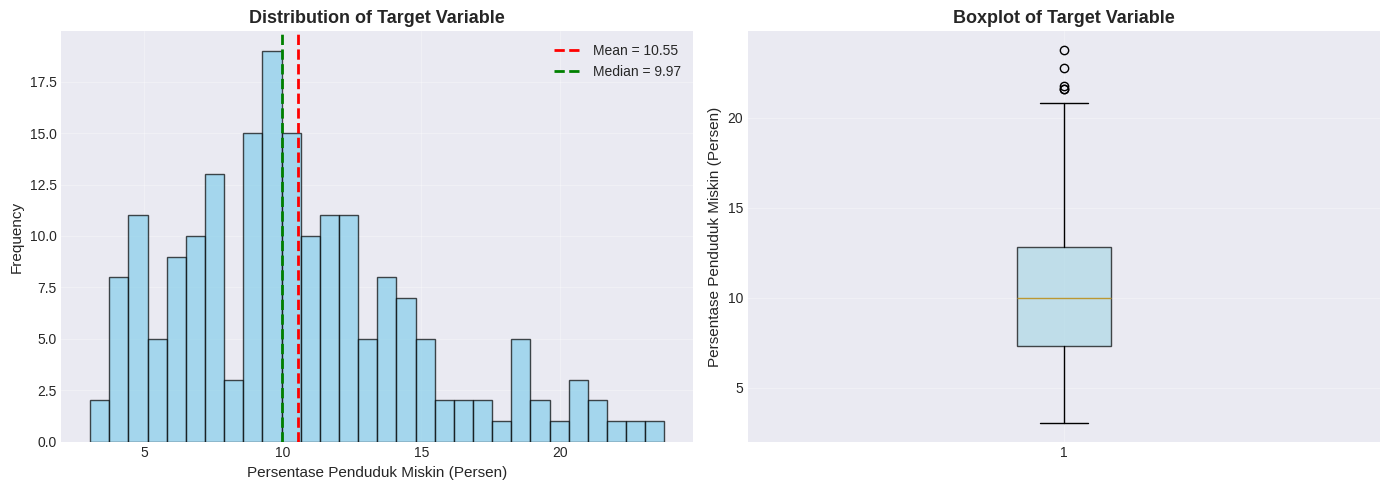

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df_clean[target], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df_clean[target].mean(), color='red', linestyle='--',
                linewidth=2, label=f'Mean = {df_clean[target].mean():.2f}')
axes[0].axvline(df_clean[target].median(), color='green', linestyle='--',
                linewidth=2, label=f'Median = {df_clean[target].median():.2f}')
axes[0].set_xlabel(target, fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Distribution of Target Variable', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].boxplot(df_clean[target], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1].set_ylabel(target, fontsize=11)
axes[1].set_title('Boxplot of Target Variable', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

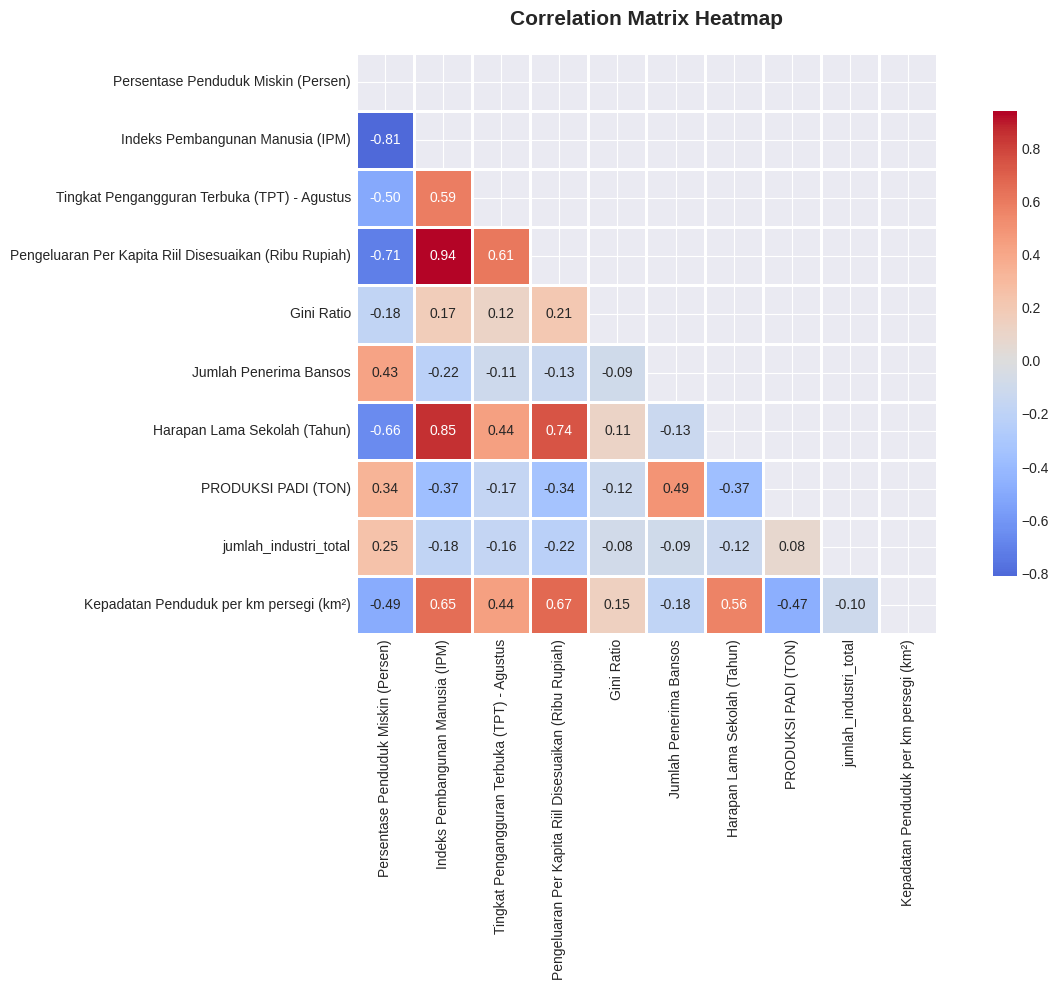

In [88]:
plt.figure(figsize=(14, 10))
correlation_matrix = df_clean[[target] + X_names].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

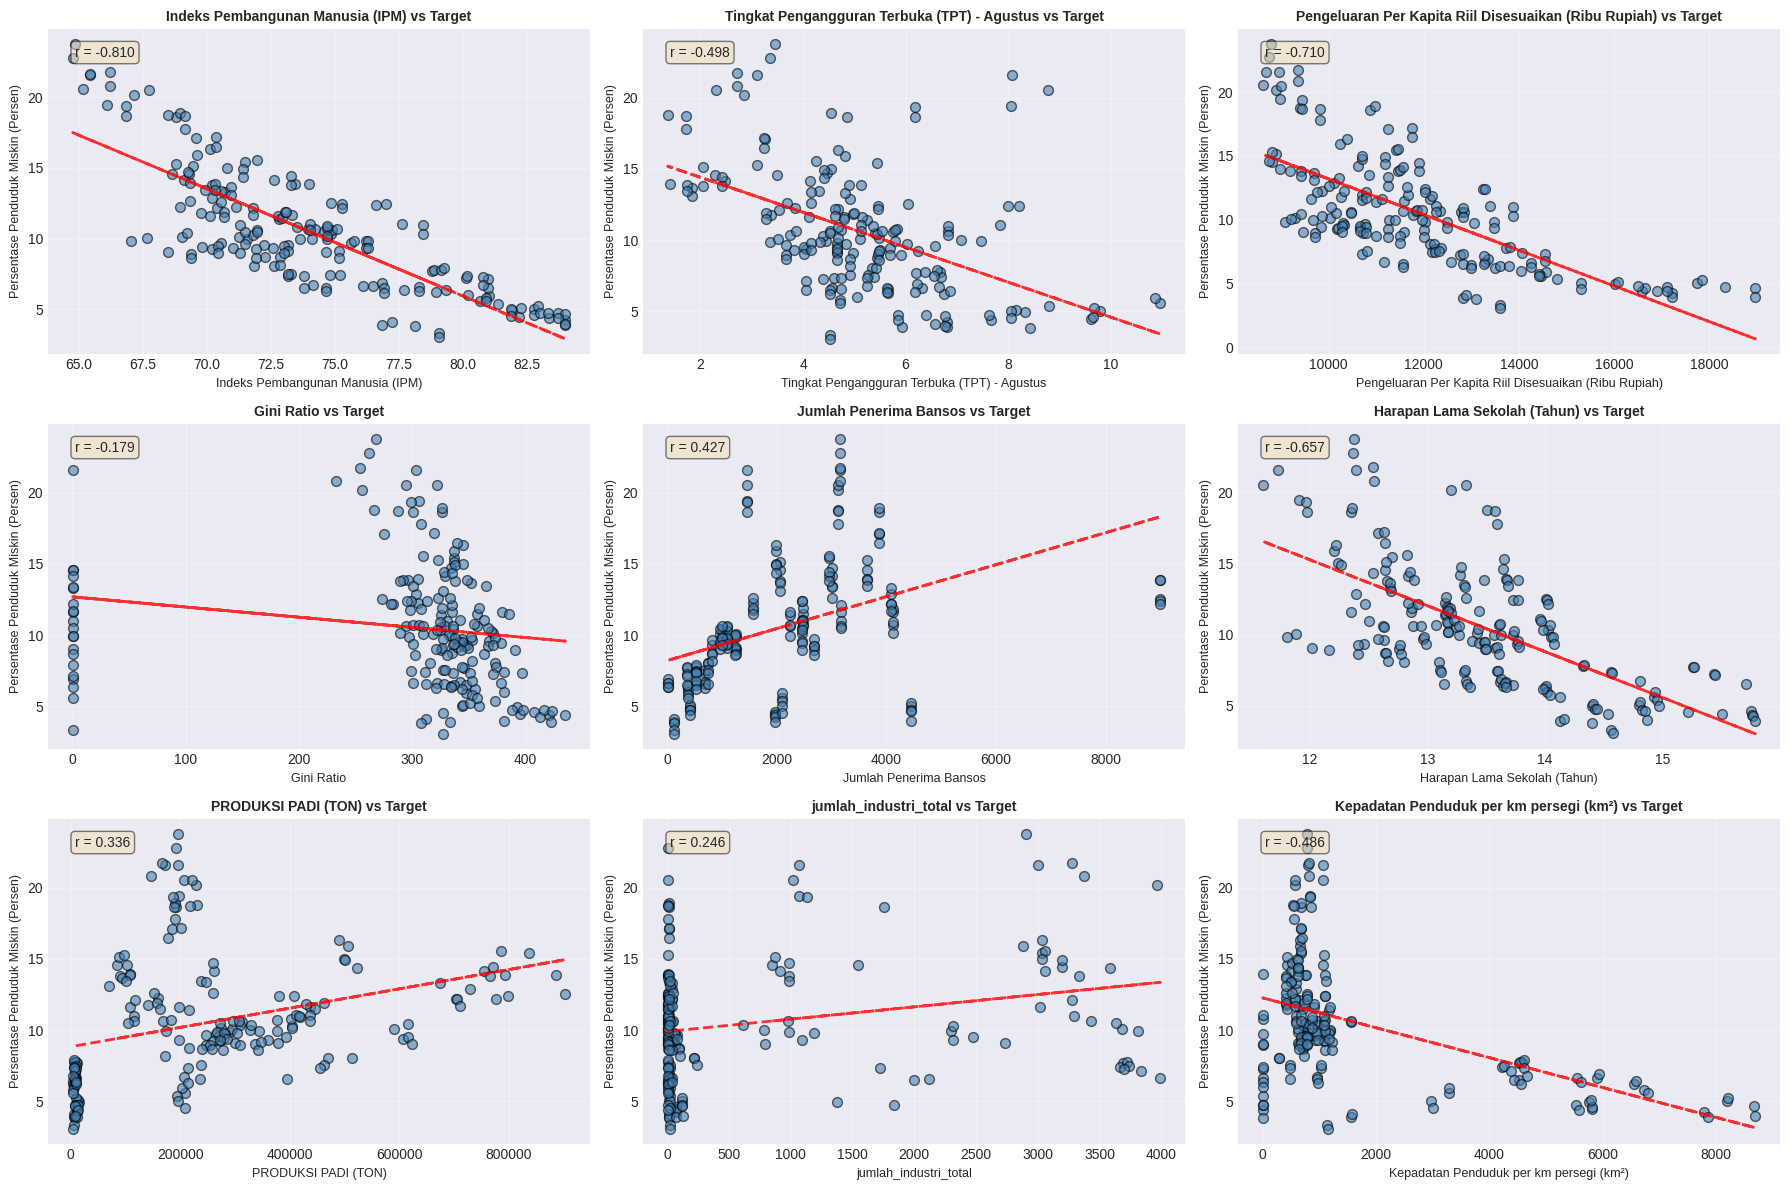

In [89]:
n_features = len(X_names)
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.flatten()

for idx, feature in enumerate(X_names):
    axes[idx].scatter(df_clean[feature], df_clean[target],
                     alpha=0.6, s=50, color='steelblue', edgecolor='black')

    z = np.polyfit(df_clean[feature], df_clean[target], 1)
    p = np.poly1d(z)
    axes[idx].plot(df_clean[feature], p(df_clean[feature]),
                   "r--", linewidth=2, alpha=0.8)

    corr = df_clean[[feature, target]].corr().iloc[0, 1]
    axes[idx].text(0.05, 0.95, f'r = {corr:.3f}',
                   transform=axes[idx].transAxes, fontsize=10,
                   verticalalignment='top', bbox=dict(boxstyle='round',
                   facecolor='wheat', alpha=0.5))

    axes[idx].set_xlabel(feature, fontsize=9)
    axes[idx].set_ylabel(target, fontsize=9)
    axes[idx].set_title(f'{feature} vs Target', fontsize=10, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

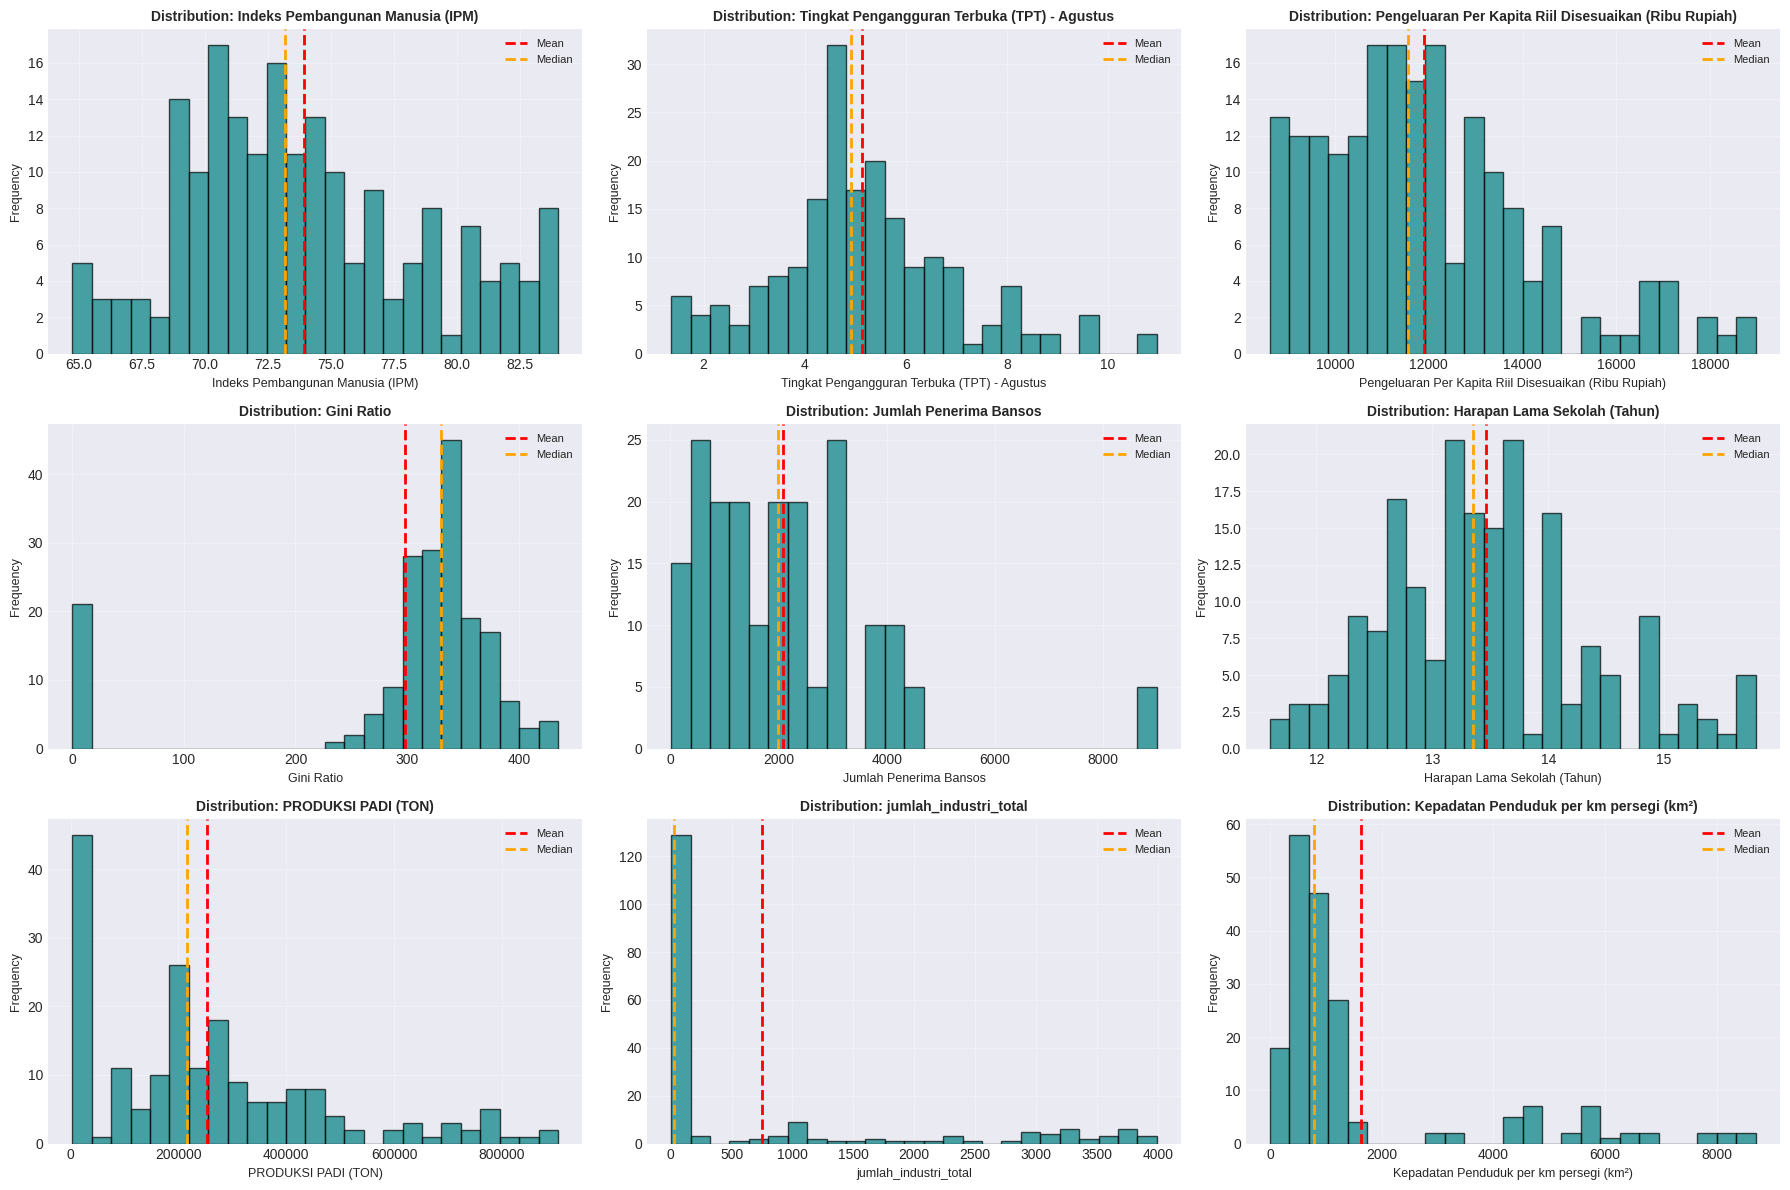

In [90]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.flatten()

for idx, feature in enumerate(X_names):
    axes[idx].hist(df_clean[feature], bins=25, color='teal',
                   edgecolor='black', alpha=0.7)
    axes[idx].axvline(df_clean[feature].mean(), color='red',
                      linestyle='--', linewidth=2, label='Mean')
    axes[idx].axvline(df_clean[feature].median(), color='orange',
                      linestyle='--', linewidth=2, label='Median')
    axes[idx].set_xlabel(feature, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].set_title(f'Distribution: {feature}', fontsize=10, fontweight='bold')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(True, alpha=0.3)

for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

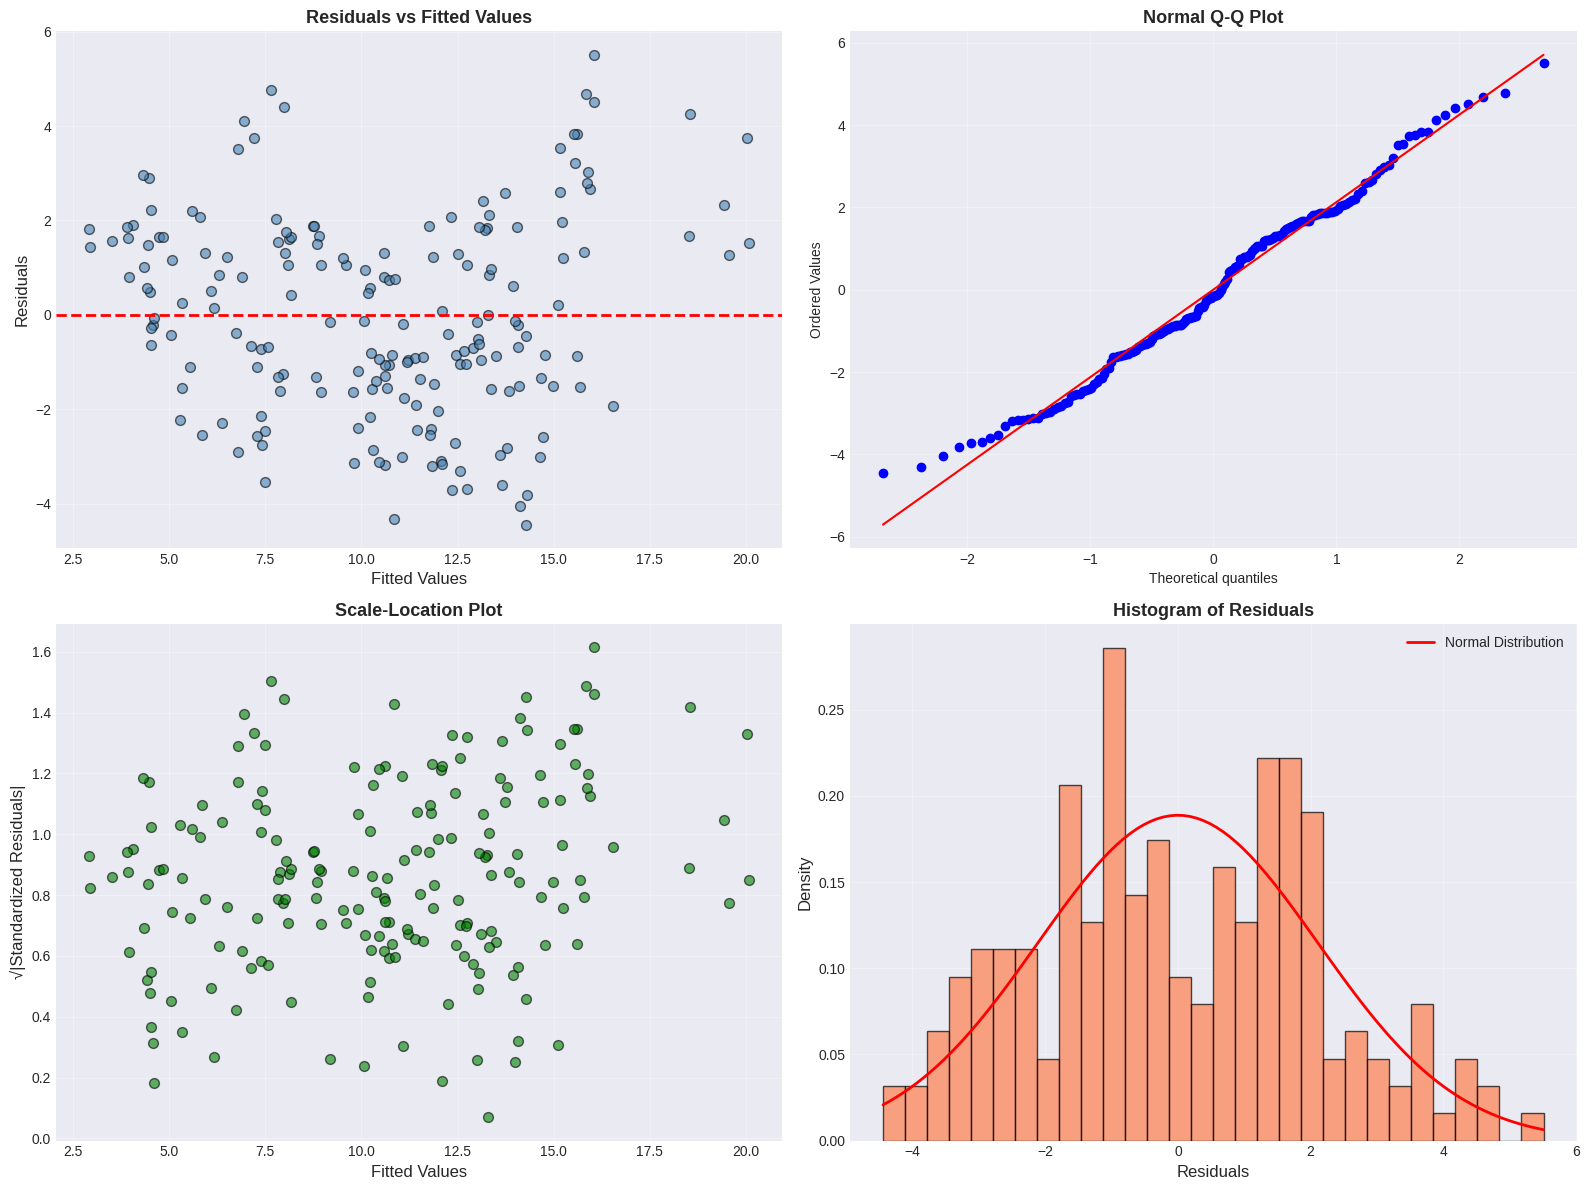

In [91]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

Y_hat_flat = Y_hat.flatten()

axes[0, 0].scatter(Y_hat_flat, residuals_flat, alpha=0.6, s=50,
                   color='steelblue', edgecolor='black')
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted Values', fontsize=12)
axes[0, 0].set_ylabel('Residuals', fontsize=12)
axes[0, 0].set_title('Residuals vs Fitted Values', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

stats.probplot(residuals_flat, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

standardized_residuals = residuals_flat / np.std(residuals_flat)
axes[1, 0].scatter(Y_hat_flat, np.sqrt(np.abs(standardized_residuals)),
                   alpha=0.6, s=50, color='green', edgecolor='black')
axes[1, 0].set_xlabel('Fitted Values', fontsize=12)
axes[1, 0].set_ylabel('√|Standardized Residuals|', fontsize=12)
axes[1, 0].set_title('Scale-Location Plot', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(residuals_flat, bins=30, color='coral',
                edgecolor='black', alpha=0.7, density=True)
mu, sigma = residuals_flat.mean(), residuals_flat.std()
x = np.linspace(residuals_flat.min(), residuals_flat.max(), 100)
axes[1, 1].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2,
                label='Normal Distribution')
axes[1, 1].set_xlabel('Residuals', fontsize=12)
axes[1, 1].set_ylabel('Density', fontsize=12)
axes[1, 1].set_title('Histogram of Residuals', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

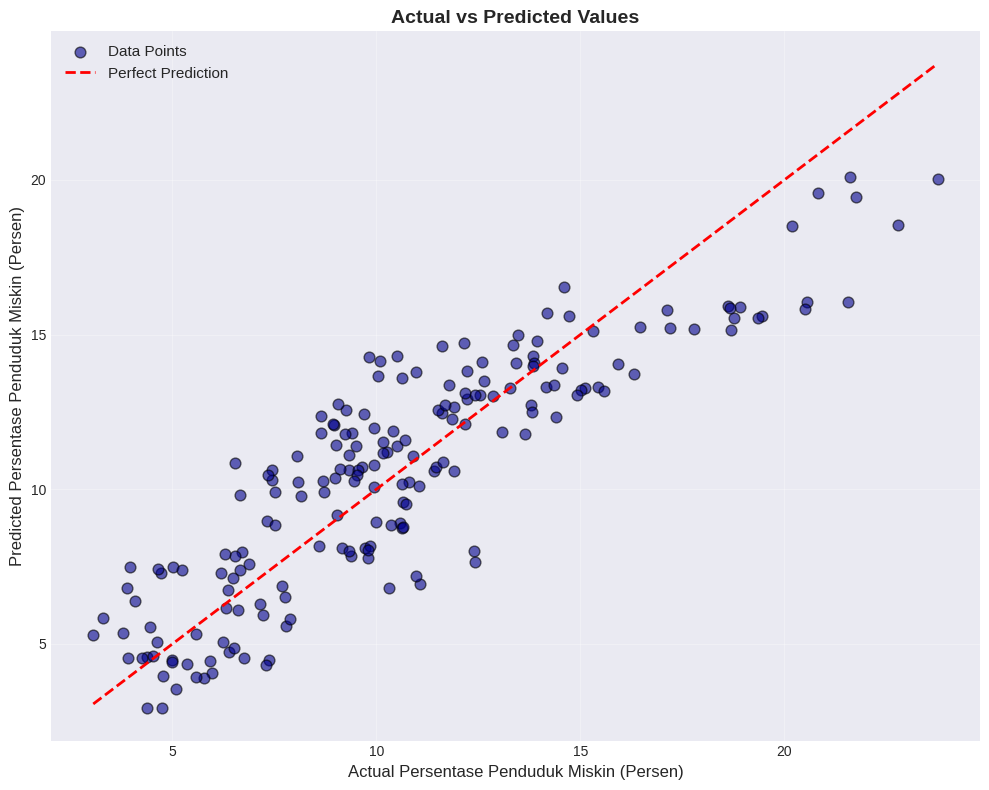

In [92]:
plt.figure(figsize=(10, 8))
plt.scatter(Y.flatten(), Y_hat_flat, alpha=0.6, s=60,
           color='darkblue', edgecolor='black', label='Data Points')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--',
         linewidth=2, label='Perfect Prediction')

plt.xlabel(f'Actual {target}', fontsize=12)
plt.ylabel(f'Predicted {target}', fontsize=12)
plt.title('Actual vs Predicted Values', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

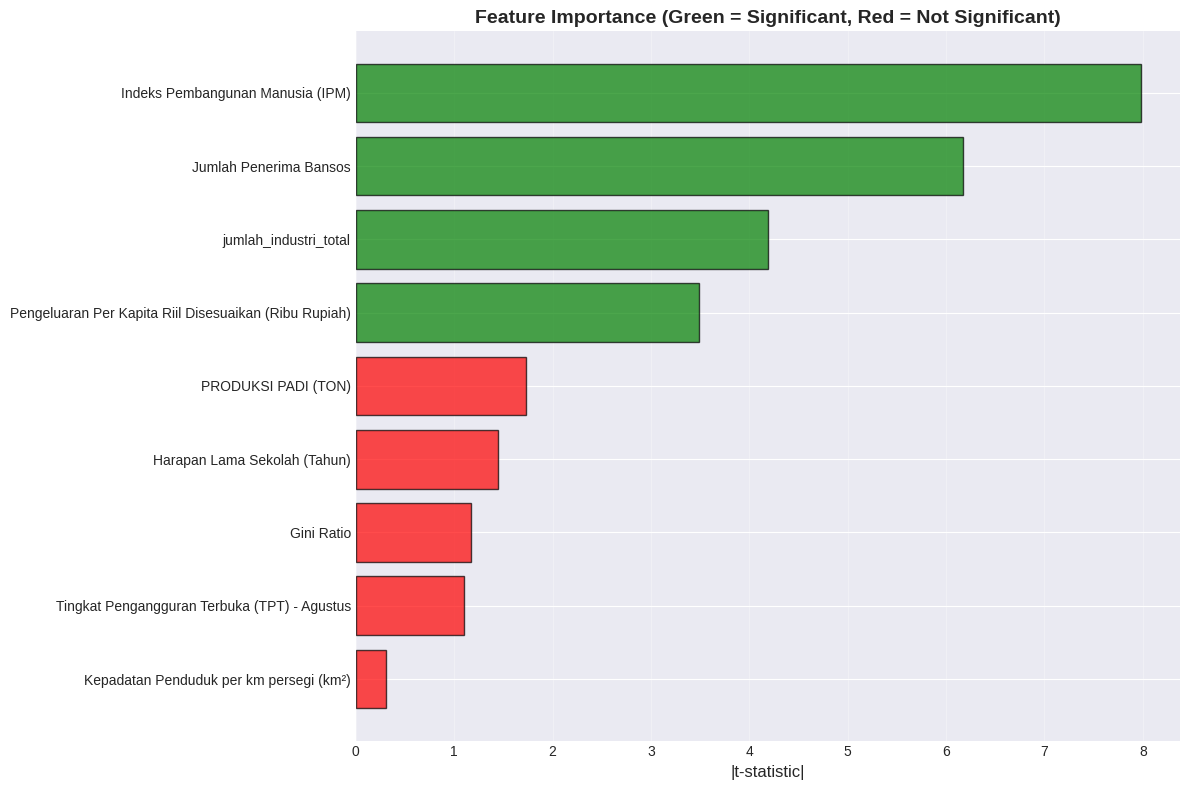

In [93]:
feature_importance = pd.DataFrame({
    'Feature': coefficient_names[1:],
    'Coefficient': B_hat[1:].flatten(),
    '|t-statistic|': np.abs(t_stat[1:].flatten()),
    'p-value': p_values[1:].flatten()
})
feature_importance = feature_importance.sort_values('|t-statistic|', ascending=True)

plt.figure(figsize=(12, 8))
colors = ['green' if p < 0.05 else 'red' for p in feature_importance['p-value']]
plt.barh(range(len(feature_importance)), feature_importance['|t-statistic|'],
         color=colors, alpha=0.7, edgecolor='black')
plt.yticks(range(len(feature_importance)), feature_importance['Feature'], fontsize=10)
plt.xlabel('|t-statistic|', fontsize=12)
plt.title('Feature Importance (Green = Significant, Red = Not Significant)',
          fontsize=14, fontweight='bold')
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Testing Prediction

In [95]:
def predict_new_data(new_data_dict, B_hat, X_names):
    X_new = np.array([new_data_dict[name] for name in X_names]).reshape(1, -1)
    X_new_with_intercept = np.hstack([np.ones((1, 1)), X_new])
    Y_pred = X_new_with_intercept @ B_hat
    return Y_pred[0][0]

def predict_with_confidence_interval(new_data_dict, B_hat, X_names, MSE, XTX_inv,
                                     t_critical, N, k):
    X_new = np.array([new_data_dict[name] for name in X_names]).reshape(1, -1)
    X_new_with_intercept = np.hstack([np.ones((1, 1)), X_new])
    Y_pred = (X_new_with_intercept @ B_hat)[0][0]

    SE_pred = np.sqrt(MSE * (1 + X_new_with_intercept @ XTX_inv @ X_new_with_intercept.T))
    SE_pred = SE_pred[0][0]

    CI_lower = Y_pred - t_critical * SE_pred
    CI_upper = Y_pred + t_critical * SE_pred

    return Y_pred, CI_lower, CI_upper, SE_pred

In [96]:
# Example 1
new_data = {
    'Indeks Pembangunan Manusia (IPM)': 70.5,
    'Tingkat Pengangguran Terbuka (TPT) - Agustus': 5.2,
    'Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)': 11000,
    'Gini Ratio': 0.35,
    'Jumlah Penerima Bansos': 50000,
    'Harapan Lama Sekolah (Tahun)': 12.5,
    'STATUS BALITA PENDEK TB-U': 15.0,
    'PRODUKSI PADI (TON)': 100000,
    'jumlah_industri_total': 500,
    'Laju Pertumbuhan Penduduk per Tahun (Persen)': 1.2,
    'Kepadatan Penduduk per km persegi (km²)': 500
}

for feature, value in new_data.items():
    print(f"  {feature:<55} : {value:>12.2f}")

prediction = predict_new_data(new_data, B_hat, X_names)
print(f"\n{'Prediction Result':}")
print(f"Persentase Penduduk Miskin (Prediksi) : {prediction:.4f}%")

  Indeks Pembangunan Manusia (IPM)                        :        70.50
  Tingkat Pengangguran Terbuka (TPT) - Agustus            :         5.20
  Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)   :     11000.00
  Gini Ratio                                              :         0.35
  Jumlah Penerima Bansos                                  :     50000.00
  Harapan Lama Sekolah (Tahun)                            :        12.50
  STATUS BALITA PENDEK TB-U                               :        15.00
  PRODUKSI PADI (TON)                                     :    100000.00
  jumlah_industri_total                                   :       500.00
  Laju Pertumbuhan Penduduk per Tahun (Persen)            :         1.20
  Kepadatan Penduduk per km persegi (km²)                 :       500.00

Prediction Result
Persentase Penduduk Miskin (Prediksi) : 48.7118%


In [97]:
# Example 2
prediction, ci_lower, ci_upper, se = predict_with_confidence_interval(new_data, B_hat, X_names, MSE, XTX_inv, t_critical, N, k)

print(f"Prediction: {prediction: .4f}%")
print(f"Standard Error: {se: .4f}")
print(f"95% Confidence Interval: [{ci_lower: .4f}, {ci_upper: .4f}]")
print(f"\nInterpretation:")
print(f"For areas with these characteristics is between {ci_lower: .2f}% and {ci_upper: .2f}%")

Prediction:  48.7118%
Standard Error:  6.1115
95% Confidence Interval: [ 36.6524,  60.7711]

Interpretation:
For areas with these characteristics is between  36.65% and  60.77%


In [99]:
# Example 3
scenarios = {
    'Baseline': new_data.copy(),
    'IPM Meningkat (+5)': {**new_data, 'Indeks Pembangunan Manusia (IPM)': 75.5},
    'TPT Menurun (-2%)': {**new_data, 'Tingkat Pengangguran Terbuka (TPT) - Agustus': 3.2},
    'Bansos Naik 50%': {**new_data, 'Jumlah Penerima Bansos': 75000}
}

print(f"\n{'Skenario':<30} | {'Prediksi Kemiskinan':>20} | {'Perubahan':>15}")

baseline_pred = predict_new_data(scenarios['Baseline'], B_hat, X_names)
for scenario_name, scenario_data in scenarios.items():
    pred = predict_new_data(scenario_data, B_hat, X_names)
    change = pred - baseline_pred
    change_pct = (change / baseline_pred * 100) if baseline_pred != 0 else 0

    print(f"{scenario_name:<30} | {pred:>18.4f}% | {change:>+14.4f}%")


Skenario                       |  Prediksi Kemiskinan |       Perubahan
Baseline                       |            48.7118% |        +0.0000%
IPM Meningkat (+5)             |            42.9538% |        -5.7580%
TPT Menurun (-2%)              |            48.9598% |        +0.2480%
Bansos Naik 50%                |            66.9355% |       +18.2238%


In [101]:
# Example 4
new_area = pd.DataFrame({
    'Indeks Pembangunan Manusia (IPM)': [68.0, 72.0, 75.0],
    'Tingkat Pengangguran Terbuka (TPT) - Agustus': [6.5, 4.8, 3.2],
    'Pengeluaran Per Kapita Riil Disesuaikan (Ribu Rupiah)': [9500, 11500, 13000],
    'Gini Ratio': [0.38, 0.33, 0.30],
    'Jumlah Penerima Bansos': [60000, 45000, 35000],
    'Harapan Lama Sekolah (Tahun)': [11.5, 12.8, 14.0],
    'PRODUKSI PADI (TON)': [80000, 120000, 150000],
    'jumlah_industri_total': [300, 600, 900],
    'Kepadatan Penduduk per km persegi (km²)': [400, 550, 700]
})

new_area_ordered = new_area[X_names]
X_batch = np.hstack([np.ones((len(new_area_ordered), 1)), new_area_ordered.values])
Y_pred_batch = X_batch @ B_hat

print(f"Prediction Results for {len(new_area)} Regions:")
print(f"{'Region':<10} | {'HDI':>8} | {'TPT':>8} | {'Poverty Prediction':>20}")
for i in range(len(new_area_ordered)):
    print(f"Area {i+1:<3} | {new_area_ordered.iloc[i, 0]:>8.2f} | {new_area_ordered.iloc[i, 1]:>8.2f} | {Y_pred_batch[i][0]:>18.4f}%")

Prediction Results for 3 Regions:
Region     |      HDI |      TPT |   Poverty Prediction
Area 1   |    68.00 |     6.50 |            56.8056%
Area 2   |    72.00 |     4.80 |            44.0058%
Area 3   |    75.00 |     3.20 |            35.5223%


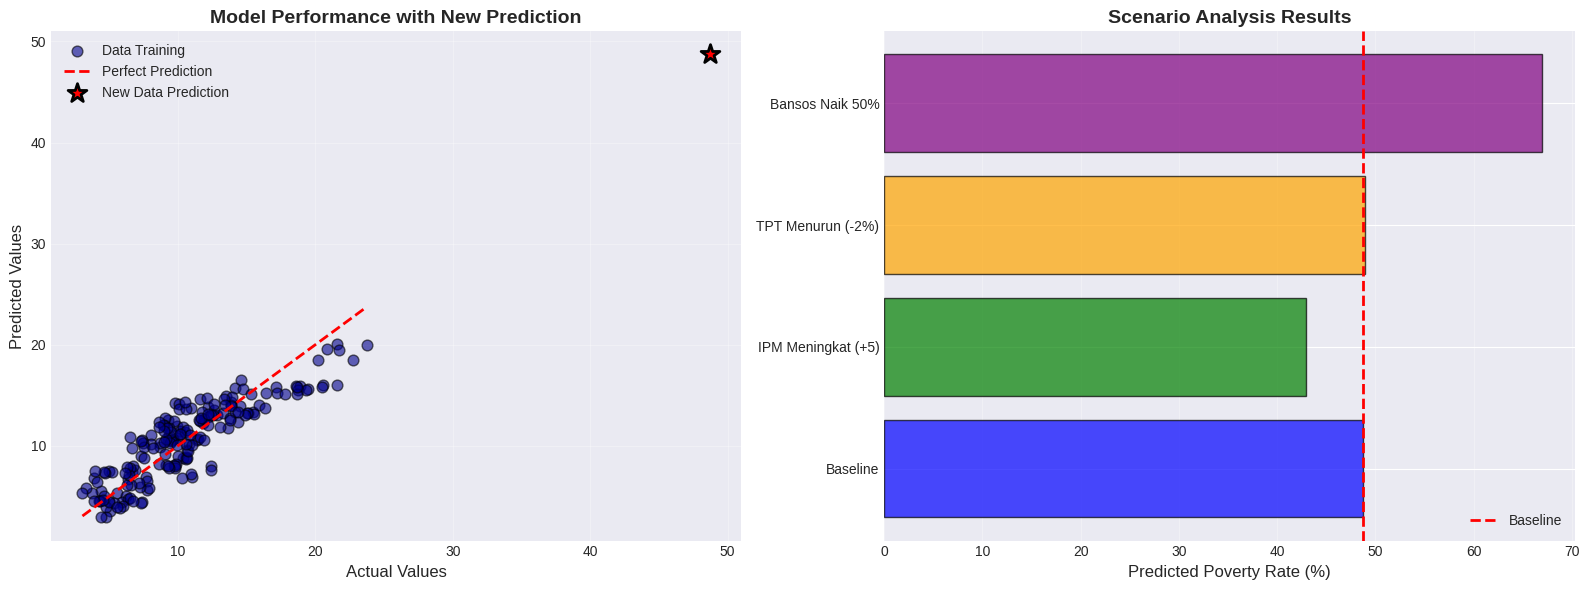

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(Y.flatten(), Y_hat.flatten(), alpha=0.6, s=60,
               color='darkblue', edgecolor='black', label='Data Training')
axes[0].plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--',
             linewidth=2, label='Perfect Prediction')
axes[0].scatter([prediction], [prediction], color='red', s=200,
               marker='*', edgecolor='black', linewidth=2,
               label='New Data Prediction', zorder=5)
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title('Model Performance with New Prediction', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

scenario_names = list(scenarios.keys())
scenario_preds = [predict_new_data(scenarios[name], B_hat, X_names)
                  for name in scenario_names]
colors_scenario = ['blue', 'green', 'orange', 'purple']

axes[1].barh(scenario_names, scenario_preds, color=colors_scenario,
            alpha=0.7, edgecolor='black')
axes[1].axvline(baseline_pred, color='red', linestyle='--',
               linewidth=2, label='Baseline')
axes[1].set_xlabel('Predicted Poverty Rate (%)', fontsize=12)
axes[1].set_title('Scenario Analysis Results', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()